In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class BasicNN(nn.Module):
    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(1.7), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad = False)

    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [3]:
input_doses = torch.linspace(start=0, end=1, steps=11)

In [4]:
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [5]:
model = BasicNN()

In [6]:
output_values = model(input_doses)

<Axes: xlabel='None', ylabel='None'>

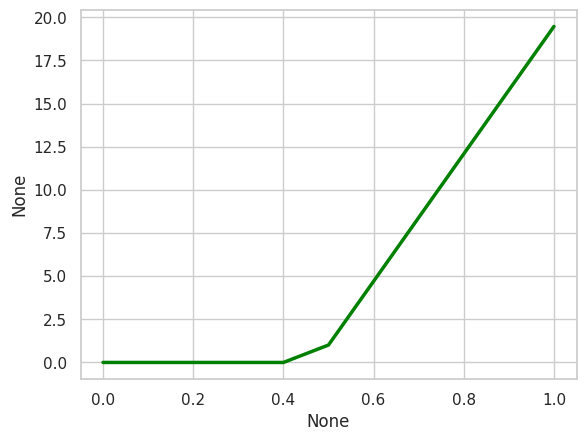

In [8]:
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y = output_values,
             color="green",
             linewidth=2.5)

In [9]:
class BasicNN_train(nn.Module):
    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad = True)

    def forward(self, input):

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

Text(0.5, 0, 'Dose')

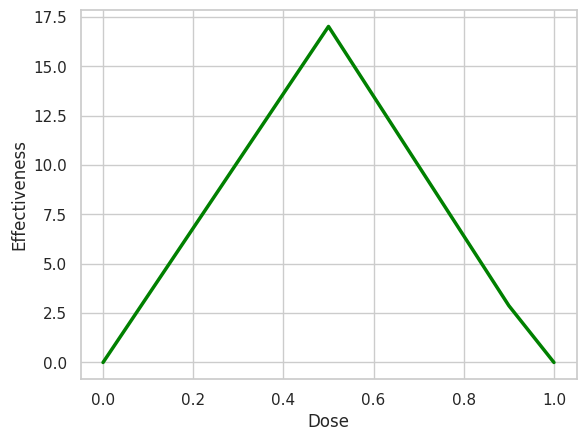

In [10]:
model = BasicNN_train()

output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
            y=output_values.detach(),
            color="green",
            linewidth=2.5)

plt.ylabel("Effectiveness")
plt.xlabel("Dose")

In [11]:
inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([.0,1.,0.])

In [12]:
optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization:" + str(model.final_bias.data) + "\n")

for epoch in range(100):

    total_loss = 0

    for iteration in range(len(inputs)):

        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i)**2

        loss.backward()

        total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + "Final Bias: " + str(model.final_bias.data) + "\n")

Final bias, before optimization:tensor(0.)

Step: 0Final Bias: tensor(-3.2020)

Step: 1Final Bias: tensor(-5.7636)

Step: 2Final Bias: tensor(-7.8129)

Step: 3Final Bias: tensor(-9.4523)

Step: 4Final Bias: tensor(-10.7638)

Step: 5Final Bias: tensor(-11.8131)

Step: 6Final Bias: tensor(-12.6525)

Step: 7Final Bias: tensor(-13.3240)

Step: 8Final Bias: tensor(-13.8612)

Step: 9Final Bias: tensor(-14.2909)

Step: 10Final Bias: tensor(-14.6348)

Step: 11Final Bias: tensor(-14.9098)

Step: 12Final Bias: tensor(-15.1298)

Step: 13Final Bias: tensor(-15.3059)

Step: 14Final Bias: tensor(-15.4467)

Step: 15Final Bias: tensor(-15.5594)

Step: 16Final Bias: tensor(-15.6495)

Step: 17Final Bias: tensor(-15.7216)

Step: 18Final Bias: tensor(-15.7793)

Step: 19Final Bias: tensor(-15.8254)

Step: 20Final Bias: tensor(-15.8623)

Step: 21Final Bias: tensor(-15.8919)

Step: 22Final Bias: tensor(-15.9155)

Step: 23Final Bias: tensor(-15.9344)

Step: 24Final Bias: tensor(-15.9495)

Step: 25Final Bias: 

Text(0.5, 0, 'Dose')

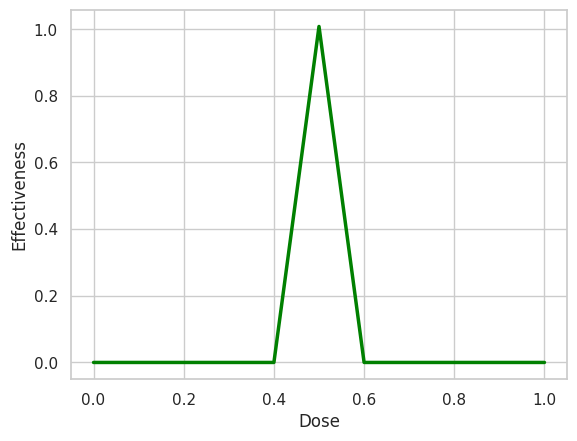

In [13]:
output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses,
            y=output_values.detach(),
            color="green",
            linewidth=2.5)

plt.ylabel("Effectiveness")
plt.xlabel("Dose")